In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

We use the enronSpamSubset.csv and the lingSpam.csv as our dataset.

In [85]:
sp_data0 = pd.read_csv("./enronSpamSubset.csv").drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
sp_data1 = pd.read_csv("./lingSpam.csv").drop(['Unnamed: 0'], axis=1)
sp_data1.drop(sp_data1.tail(1).index,inplace=True) # drop last rwo since it summarizes all rows again
#sp_data2 = pd.read_csv("./completeSpamAssassin.csv").drop(['Unnamed: 0'], axis=1)
sp_data = pd.concat([sp_data0, sp_data1]) 
sp_data.head()

,Body,Label
0,Subject: stock promo mover : cwtd\n * * * urge...,1
1,Subject: are you listed in major search engine...,1
2,"Subject: important information thu , 30 jun 20...",1
3,Subject: = ? utf - 8 ? q ? bask your life with...,1
4,"Subject: "" bidstogo "" is places to go , things...",1


In [1]:
textlen = [len(text) for text in sp_data["Body"]]
plt.figure(figsize=(5,5))
plt.hist(textlen, bins=np.logspace(np.log10(1),np.log10(1e6), 30), color='blue', edgecolor='k', alpha=0.65)
plt.xticks(fontsize=11)
plt.title("a) Distributon of the lenght of e-mails",fontsize=11)
plt.ylabel("number of e-mails",fontsize=11)
plt.xlabel("number of characters",fontsize=11)
plt.gca().set_xscale("log")
plt.grid(True, which="both", ls="-")
plt.tight_layout()
plt.savefig("./char_count.pdf")
print(np.max(textlen))
print(np.min(textlen))

NameError: name 'sp_data' is not defined

Below a spam and non-spam mail is shown.

In [86]:
mail_index = 100
print(sp_data.iloc[mail_index,1], sp_data.iloc[mail_index,0])# 1 for spam 0 for ham
mail_index = 6006
print(sp_data.iloc[mail_index,1], sp_data.iloc[mail_index,0])# 1 for spam 0 for ham

1 Subject: inexpensive online medication here
 pummel wah springtail cutler bodyguard
 we ship quality medications overnight to your door !
 simple , quick and affordable !
 we deliver quality medications to your door !
 stop getting brochures here
 systematic defector alum arachnid inure cross he pickering

0 Subject: organizational changes
 we are pleased to announce the following organizational changes :
 enron global assets and services
 in order to increase senior management focus on our international businesses , we are creating a new business unit , enron global assets and services ( egas ) . egas will be led by kevin hannon , chief executive officer , and jim hughes , chief operating officer . kevin will report to the enron corp . office of the chairman . with the exception of the wessex water company ( which will remain in the enron transportation services organization ) and enron india ( discussed below ) , egas will include all of the assets and activities of the former enro

In [87]:
# check if we have duplicates
print("There are {} duplicates.".format(np.sum(sp_data.duplicated())))
sp_data = sp_data.drop_duplicates() # remove duplicates

There are 327 duplicates.


In [88]:
sp_data.info() # check if we have missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12277 entries, 0 to 2603
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    12277 non-null  object
 1   Label   12277 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 287.7+ KB


In [89]:
# delete missing values
sp_data.dropna(inplace=True)
sp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12277 entries, 0 to 2603
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    12277 non-null  object
 1   Label   12277 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 287.7+ KB


No missing values!

Clean Data by functuion below and apply bag of words

In [90]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')


def prep_mails(text_col, features=[1,1,1,1,1]):
    
    text_col = [text[7:] for text in text_col] # do not include "Subject:" prefix
    
    if features[0]:
        # remove links since they end up in tokens with no meaning
        text_col = [re.sub(r'http\S+', '', text) for text in text_col]
    
    if features[1]:
        # remove everything exept alphabetical characters and numbers
        pattern = ["[^a-zA-Z0-9]", "[^a-zA-Z]"]
        text_col = [re.sub(pattern[1]," ",text) for text in text_col]
    
    if features[2]:
        # convert uppercase chars in lowercase chars
        text_col = [text.lower() for text in text_col]
    
    # turn sentences into seperate worlds
    data_tokenized = [nltk.word_tokenize(text) for text in text_col]
    
    if features[3]:
        # lemmatize all world, that is convert them into most basic form
        lemma = WordNetLemmatizer()
        data_tokenized = [[lemma.lemmatize(word) for word in text] for text in data_tokenized]
    
    if features[4]:
        stopwords = nltk.corpus.stopwords.words("english")
        data_tokenized = [[word for word in text if word not in stopwords] for text in data_tokenized]
    
    return data_tokenized


[nltk_data] Downloading package wordnet to /home/fabian/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/fabian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/fabian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [91]:
testtext = ["Subject: Hello, this is test 1.0. Here we show how the prep_mails function affects Emails!!!!",
            "A tutorial can be found at https://www.youtube.com/watch?v=cNLPt02RwF0"]
outtext = prep_mails(testtext)
print(outtext)

[['hello', 'test', 'show', 'prep', 'mail', 'function', 'affect', 'email'], ['ial', 'found']]


In [92]:
mail_index = 12276
print(sp_data.iloc[mail_index,1]) # 1 for spam 0 for ham
print(sp_data.iloc[mail_index,0])
print(prep_mails( [sp_data.iloc[mail_index,0]]))

0
Subject: euralex ' 98 - revised programme
 
 euralex ' 98 - liege , belgium ( 4 - 8 august 1998 ) dear colleagues , the final programme of the 8th international congress of the european association for lexicography ( euralex ' 98 ) is now available at the following web address : http : / / engdep1 . philo . ulg . ac . be / euralex . htm ( click on euralex ' 98 final programme ) or directly at http : / / engdep1 . philo . ulg . ac . be / michiels / final . htm best wishes , thierry fontenelle

[['euralex', 'revised', 'programme', 'euralex', 'liege', 'belgium', 'august', 'dear', 'colleague', 'final', 'programme', 'th', 'international', 'congress', 'european', 'association', 'lexicography', 'euralex', 'available', 'following', 'web', 'address', 'http', 'engdep', 'philo', 'ulg', 'ac', 'euralex', 'htm', 'click', 'euralex', 'final', 'programme', 'directly', 'http', 'engdep', 'philo', 'ulg', 'ac', 'michiels', 'final', 'htm', 'best', 'wish', 'thierry', 'fontenelle']]


check number of unique words with anbd without applying cleaning steps

In [93]:
sp_data_prepped = prep_mails(sp_data["Body"])

In [94]:
words = [word for text in sp_data_prepped for word in text]
uwords = pd.unique(words)
print(len(uwords))

103759


In [95]:
sp_data_unprepped = prep_mails(sp_data["Body"],[0,0,0,0,0])

In [96]:
words = [word for text in sp_data_unprepped for word in text]
uwords = pd.unique(words)
print(len(uwords))

126019


In [97]:
# count occurences of attibutes in mails
# reduced number of attributes to the N-attributes with most occureces
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=10)
x = vectorizer.fit_transform([" ".join(text) for text in sp_data_prepped]).toarray()
vectorizer.get_feature_names()

['com',
 'company',
 'ect',
 'enron',
 'ha',
 'information',
 'language',
 'please',
 'wa',
 'would']

In [80]:
# seperate spam and ham mails
spam_only = np.array(sp_data_prepped)[sp_data["Label"]]
ham_only = np.array(sp_data_prepped)[np.logical_not(sp_data["Label"])]

<ipython-input-80-85bc1d2f8193>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  spam_only = np.array(sp_data_prepped)[sp_data["Label"]]
<ipython-input-80-85bc1d2f8193>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ham_only = np.array(sp_data_prepped)[np.logical_not(sp_data["Label"])]


In [126]:
from sklearn.feature_extraction.text import CountVectorizer
vec_size = 10
vectorizer0 = CountVectorizer(max_features=vec_size)
vectorizer1 = CountVectorizer(max_features=vec_size)
spam_attr_count = vectorizer0.fit_transform([" ".join(text) for text in spam_only]).toarray()
ham_attr_count = vectorizer1.fit_transform([" ".join(text) for text in ham_only]).toarray()

In [127]:
s0 = np.sum(spam_attr_count,axis=0)
mask0 = np.argsort(s0)
spam_names = np.array(vectorizer0.get_feature_names())[mask0]
print(spam_names)
print(s0[mask0])

s1 = np.sum(ham_attr_count,axis=0)
mask1 = np.argsort(s1)
ham_names = np.array(vectorizer1.get_feature_names())[mask1]
print(ham_names)
print(s1[mask1])

['company' 'ceo' 'club' 'ha' 'cwtd' 'statement' 'corp' 'world' 'trade'
 'china']
[ 49658  56752  56752  56752  63846  63846  70940 134786 148974 156068]
['wa' 'com' 'would' 'hou' 'ha' 'please' 'university' 'language' 'ect'
 'enron']
[ 4775  4798  5129  5267  5331  5350  5952  7845 10984 17904]


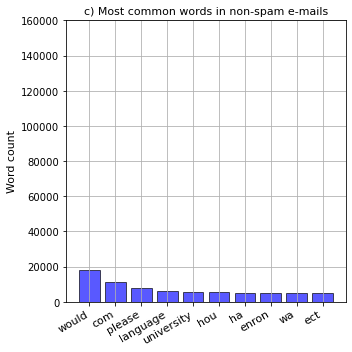

In [134]:
#histogram with most common words descending
np_s1=np.array(s1)
mask1_1 = np_s1.argsort()[::-1]
ham_names_2=ham_names[mask1_1]

plt.figure(figsize=(5,5))
plt.bar(x=ham_names_2, height=s1[mask1_1], color='blue', edgecolor='k', alpha=0.65)
plt.xticks(rotation=30,fontsize=11, ha="right")
plt.title("c) Most common words in non-spam e-mails",fontsize=11)
plt.ylabel("Word count",fontsize=11)
plt.ylim(0,1.6e5)
plt.grid()
plt.tight_layout()
plt.savefig("./ham_count.pdf")

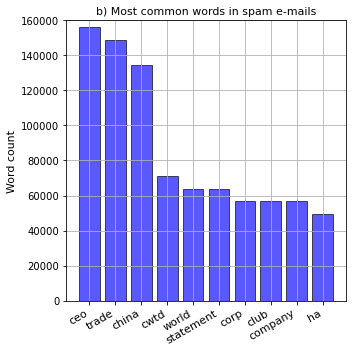

In [133]:
#histogram with most common words descending
np_s0=np.array(s0)
mask0_0 = np_s0.argsort()[::-1]
spam_names_2=spam_names[mask0_0]

plt.figure(figsize=(5,5))
plt.bar(x=spam_names_2, height=s0[mask0_0], color='blue', edgecolor='k', alpha=0.65)
plt.xticks(rotation=30,fontsize=11, ha="right")
plt.title("b) Most common words in spam e-mails",fontsize=11)
plt.ylabel("Word count",fontsize=11)
plt.ylim(0,1.6e5)
plt.grid()
plt.tight_layout()
plt.savefig("./spam_count.pdf")

# Plots for report

Text(0.5, 1.0, 'Distribution of Spam and Nonspam')

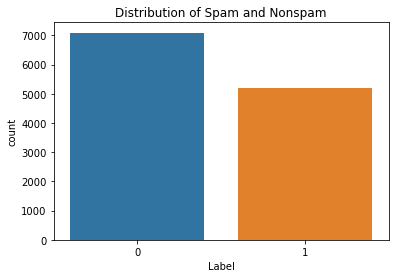

In [107]:
ax = sns.countplot(data=sp_data, x='Label')
ax.set_title("Distribution of Spam and Nonspam")

In [108]:
sp_data['Label'].sum() #Get exact number of spam emails

5183